## Task 3: Summarization and comparison of résumés + job postings


### CoNVO

**Context:** Bloc is a career services management platform that builds smart career and data management tools for job-seekers and the organizations serving them. In particular, Bloc seeks to provide and facilitate access to tools for effectively presenting job-seekers' credentials and matching employers' job postings, and thereby improve outcomes.

**Need:** Career advisors are expected to provide personalized recommendations and assistance to many job-seekers at any given time. To accomplish that, they need to stay up-to-date on the current status of particular job markets, and understand how their group of advisees fit into that space.

**Vision:** Automated summarization of the contents of a group of job-seekers' résumés and, separately, open job postings in a particular field(s), along with a quantitative and/or visual representation of the similarity between a set of résumés and job postings, with easy-to-understand outputs for non-technical viewers.

**Outcome:** A standalone, proof-of-concept process for summarizing small- to medium-sized collections of text. A separate POC for comparing sets of résumés to sets of job postings in a quantitative and/or visual manner.


### Data Summary

A collection of ~125 (+ ~2400) résumés as text extracted from PDFs (see Task 1) as well as ~4800 job postings as JSON fetched from external APIs(see Task 2).


### Proposed Methodology

Unsupervised summarization of many texts is a common and well-studied problem; there's no need for us to reinvent the wheel. Topic modeling (e.g. LDA) is a good bet if you have enough texts and don't require fine detail. Ranking the most important words/terms by frequency or a more sophisticated metric (e.g. tf-idf, bm25) works well for smaller corpora, but doesn't necessarily reveal relationships between concepts. Graph-based methods for extract summarization of key words/terms/sentences (e.g. TextRank) could also work here.

Comparing two collections of texts is potentially trickier. An explicit comparison could be made by identifying words/terms that are most important in one corpus and least important in the other (and vice-versa), while an implicit comparison could just show the top words/terms for each corpus side-by-side. Comparing topic models is generally _not_ a valid method. Visualizing the comparison is probably the most important aspect of this task; we want to make it intuitive and interpretable.


### Definitions of Success

This entire task is icing on the cake. Any concrete outputs will be considered a success!


### Risks

We may not have enough texts for some unsupervised methods (namely, topic modeling and any deep learning methods).

## Source Code

In [1]:
%load_ext watermark

### Getting Started

In [2]:
import msvdd_bloc

In [3]:
%watermark -v -iv

CPython 3.7.3
IPython 7.8.0


In [4]:
resumes_fpath = "../data/resumes/fellows_resumes.zip"
for fname, text in msvdd_bloc.data.fileio.load_text_files_from_zip(resumes_fpath):
    # you may want to use the same preprocessing as in task 1
    # but maybe not ;)
    # text = preprocess_resume_text(text)
    break  # just stopping here so we can test things out
print(text[:1000], "...")

David Hill
7574 Stacey Rue Suite 620 Hernandezfort, MA 01644   |   747-444-2791x82067   |   sharon26@hotmail.com

EXPERIENCE 
Intuit, ​Software Engineer Intern 
Mountain View, CA           May 2018 – Present 

● Backend engineer speeding login times for Intuit Online Payroll customers using Java
● Testing comprehensive user interfaces on the frontend using automation technologies such as Selenium

and ReactJS based frameworks
U.S. Bank, ​Software Engineer Intern 
St. Paul, MN    May 2017 – August 2017 

● Worked with the software automation team using dynamic technologies such as .NET framework, C#, Visual
Studio, and Angular 2 Javascript Framework to develop automated software used by U.S. Bank engineers

● Created and maintained automation tools used to eliminate manual tasks otherwise performed by individuals
● Created comprehensive unit test plans and test cases in Selenium and javascript frameworks
● Worked on user testing, project management, error handling, and back-end developm

In [10]:
postings_fpath = "../data/postings/github_jobs.json"
postings_gh = msvdd_bloc.data.fileio.load_json(postings_fpath)
print("# postings =", len(postings_gh))
postings_gh[-1]

# postings = 67


{'id': '1e7355ba-b3be-40b8-8be4-5c22a24ce798',
 'type': 'Full Time',
 'url': 'https://jobs.github.com/positions/1e7355ba-b3be-40b8-8be4-5c22a24ce798',
 'created_at': 'Tue Sep 10 16:43:44 UTC 2019',
 'company': 'CyberArk',
 'company_url': 'http://CyberArk',
 'location': 'Newton',
 'title': 'Software Engineer- Devops Community',
 'description': '<p>Job Title: Software Engineer / Senior Software Engineer – Conjur Team\nAbout CyberArk:\nCyberArk is the global leader in privileged access security, a critical layer of IT security to protect data, infrastructure and assets across the enterprise, in the cloud and throughout the DevOps pipeline. CyberArk delivers the industry’s most complete solution to reduce risk created by privileged credentials and secrets. The company is trusted by the world’s leading organizations, including more than 50 percent of the Fortune 100, to protect against external attackers and malicious insiders.\nJob Description:\nCyberArk’s Conjur team is looking for experi

In [7]:
postings_fpath = "../data/postings/indeed_jobs.json"
postings_ind = msvdd_bloc.data.fileio.load_json(postings_fpath)
print("# postings =", len(postings_ind))
postings_ind[:1]

# postings = 4187


[{'jobtitle': 'Junior Developer',
  'company': 'Muratek',
  'city': 'New York',
  'state': 'NY',
  'country': 'US',
  'language': 'en',
  'formattedLocation': 'New York, NY',
  'source': 'Indeed',
  'date': 'Fri, 20 Sep 2019 16:25:56 GMT',
  'snippet': 'Develop and maintain code, image assets and content for multiple company and client projects. Manage multiple projects and execute design from concept to launch. We are IT Networking Consultants that work with a wide array of clientele. Linux command line....',
  'url': 'http://www.indeed.com/rc/clk?jk=f8026d3d2654ebbf&atk=',
  'onmousedown': "indeed_clk(this,'');",
  'latitude': 40.70609,
  'longitude': -74.00445,
  'jobkey': 'f8026d3d2654ebbf',
  'sponsored': False,
  'expired': False,
  'indeedApply': True,
  'formattedLocationFull': 'New York, NY 10038',
  'formattedRelativeTime': '12 days ago',
  'stations': '',
  'recommendations': []}]

In [8]:
postings_fpath = "../data/postings/themuse_jobs.json"
postings_muse = msvdd_bloc.data.fileio.load_json(postings_fpath)
print("# postings =", len(postings_muse))
postings_muse[:1]

# postings = 568


[{'contents': '<p><span>Language diverse monorepo seeks experienced wrangler to help its engineers thrive.</span></p>\n\n<p><span>We\'re growing our team rapidly and want to invest in the infrastructure our engineers need to be productive. That\'s where you come in. There\'s a lot to do with immediate impact and your customers are the engineers sitting right by you.\xa0</span></p>\n\n<p><span>Beeswax is an easy to use, massive scale and high availability advertising platform founded by industry veterans who worked together at Google. We’re well funded by leading VCs, such as RRE and Foundry Group, and are rapidly expanding our customer list and our engineering team. We offer our customers the most extensible and transparent advertising system in the world and process millions of transactions per second.\xa0</span></p>\n\n<p><span>Our engineers come from major tech companies such as Amazon and Facebook as well as many other companies with strong software disciplines. Building and sellin

In [16]:
job_list = []

for p in postings_gh:
    job_list.append(p['description'])

In [17]:
job_list

['<p>Simon &amp; Schuster is seeking a Lead Software Engineer to join a rapidly growing team focused on impacting the world of publishing through research and innovation. Working with a team of data scientists, data engineers, designers, and domain experts, you will be involved in rapidly prototyping, developing, and deploying the platforms that put insights and information into the hands of decision-makers.</p>\n<p>From databases to serverless applications, you will be designing, deploying , and managing the systems that connect our real-world data to the books and authors that inform and entertain our world. As a Full Stack (Engineer|Developer) you will engage with engineers and domain experts across the organization, collaborating to design and deploy innovative new products and services. From inception to production, you will onboard, integrate and deploy an array of cutting-edge tools and technologies to seamlessly deliver our solutions.</p>\n<p>Publishing experience is not requir

In [39]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(job_list[3], 'html.parser')

print(soup.prettify())

<p>
 Aon Cyber Solutions is looking for a Senior Developer in NY or LA. As part of an industry-leading team, you will help empower results for our clients by delivering innovative and effective solutions supporting Risk.
</p>
<p>
 APPLY HERE:
 <a href="https://us-strozfriedberg-aon.icims.com/jobs/24315/senior-developer/job">
  https://us-strozfriedberg-aon.icims.com/jobs/24315/senior-developer/job
 </a>
</p>
<p>
 Position Overview
Join our expert software development team to create new customer-facing web applications. You will apply your expertise in web development and user interface design, working in concert with subject matter experts in digital forensics, incident response, cybersecurity, and threat intelligence. Your applications will convey deeply technical facts and analyses to a variety of consumers, from risk managers to subject matter experts to C-level executives.
</p>
<p>
 The responsibilities of this position include but are not limited to the following:
</p>
<ul>
 <li>


This method should be used on sentences but for now using locaton as a string that can be compared between job and resume - I understand that there are much easier ways of comparing locations, this is just to demo idea

In [40]:
import pandas as pd

all_jobs = pd.read_csv('../data/postings/all_jobs.csv')

In [55]:
loc_set = set(all_jobs['location'].tolist())

In [56]:
loc_set

{'Abingdon, MD',
 'Addison, IL 60101',
 'Alexandria, VA',
 'Alexandria, VA 22314',
 'Alexandria, VA 22350',
 'Aliso Viejo, CA',
 'Amsterdam, Netherlands',
 'Anaheim, CA 92805',
 'Andover, MA 01810',
 'Annapolis Junction, MD',
 'Annapolis Junction, MD 20701',
 'Annapolis, MD',
 'Arlington, VA',
 'Arlington, VA 22201',
 'Arlington, VA 22202',
 'Arlington, VA 22209',
 'Ashburn, VA 20147',
 'Aurora',
 'Austin',
 'Austin, TX',
 'Austin, TX 73301',
 'Austin, TX 73344',
 'Austin, TX 78701',
 'Austin, TX 78702',
 'Austin, TX 78703',
 'Austin, TX 78704',
 'Austin, TX 78712',
 'Austin, TX 78716',
 'Austin, TX 78717',
 'Austin, TX 78721',
 'Austin, TX 78723',
 'Austin, TX 78724',
 'Austin, TX 78726',
 'Austin, TX 78727',
 'Austin, TX 78728',
 'Austin, TX 78729',
 'Austin, TX 78730',
 'Austin, TX 78731',
 'Austin, TX 78733',
 'Austin, TX 78735',
 'Austin, TX 78737',
 'Austin, TX 78741',
 'Austin, TX 78744',
 'Austin, TX 78745',
 'Austin, TX 78746',
 'Austin, TX 78747',
 'Austin, TX 78750',
 'Austi

In [77]:
import re
loc_no_zip = set([re.sub(r'[0-9]+', '',x) for x in loc_set])
loc_no_zip

{'Abingdon, MD',
 'Addison, IL ',
 'Alexandria, VA',
 'Alexandria, VA ',
 'Aliso Viejo, CA',
 'Amsterdam, Netherlands',
 'Anaheim, CA ',
 'Andover, MA ',
 'Annapolis Junction, MD',
 'Annapolis Junction, MD ',
 'Annapolis, MD',
 'Arlington, VA',
 'Arlington, VA ',
 'Ashburn, VA ',
 'Aurora',
 'Austin',
 'Austin, TX',
 'Austin, TX ',
 'Austin, Texas',
 'Austin, Texas ',
 'Bainbridge Island, WA',
 'Ballston, VA',
 'Baltimore, MD',
 'Baltimore, MD ',
 'Bedford, MA ',
 'Belcamp, MD ',
 'Bellevue, WA',
 'Bellevue, WA ',
 'Beltsville, MD ',
 'Berkeley',
 'Berkeley, CA',
 'Bethesda, MD ',
 'Beverly Hills, CA',
 'Beverly Hills, CA ',
 'Boston',
 'Boston, MA',
 'Boston, MA ',
 'Boulder, CO',
 'Braintree, MA',
 'Braintree, MA ',
 'Brookline, MA ',
 'Brooklyn, NY',
 'Brooklyn, NY ',
 'Buena Park, CA',
 'Buena Park, CA ',
 'Burbank, CA',
 'Burbank, CA ',
 'Burlington, MA',
 'Burlington, MA ',
 'Calabasas, CA ',
 'Cambridge, MA',
 'Cambridge, MA ',
 'Campbell, CA',
 'Campbell, CA ',
 'Carson, CA',
 

Download and unzip pretrained embeddings from Google News location

This code is copied from the following blog post https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d

In [51]:
import gensim

model = gensim.models.KeyedVectors.load_word2vec_format('../data/GoogleNews-vectors-negative300.bin', binary=True)


In [106]:
cities = []

In [107]:
embedding_clusters = []
word_clusters = []
for address in loc_no_zip:
    embeddings = []
    words = []
    try:
        word = address.split(',')[0]
        for similar_word, _ in model.most_similar(word, topn=30):
            words.append(similar_word)
            embeddings.append(model[similar_word])
        embedding_clusters.append(embeddings)
        word_clusters.append(words)
        cities.append(word)
    except:
        # demo code
        print(similar_word + ' not in the dictionary')

Bellingham not in the dictionary
Dickerson not in the dictionary
Bujumbura not in the dictionary
Middleboro not in the dictionary
Middleboro not in the dictionary
Middleboro not in the dictionary
Salzburg not in the dictionary
Personal_Ensign_Handicap not in the dictionary
Holmes not in the dictionary
Waterbury not in the dictionary
Waterbury not in the dictionary
Waterbury not in the dictionary
Los_Gatos not in the dictionary
Los_Gatos not in the dictionary
Beaverton not in the dictionary
Grand_Prairie not in the dictionary
Grand_Prairie not in the dictionary
Grand_Prairie not in the dictionary
Grand_Prairie not in the dictionary
Manassas not in the dictionary
Manassas not in the dictionary
Manassas not in the dictionary
Manassas not in the dictionary
Carver not in the dictionary
Midtown not in the dictionary
Coatesville not in the dictionary
Somonauk not in the dictionary
Eldred not in the dictionary
Eldred not in the dictionary
Eldred not in the dictionary
Eldred not in the dictiona

In [102]:
len(word_clusters)

180

In [103]:
len(embedding_clusters)

180

In [104]:
word_clusters

[['Issaquah',
  'Lynnwood',
  'Bothell',
  'Renton',
  'Mountlake_Terrace',
  'Sammamish',
  'Puyallup',
  'Woodinville',
  'Snohomish',
  'Spokane',
  'Bonney_Lake',
  'Stanwood',
  'Gig_Harbor',
  'Seattle',
  'Tacoma',
  'Tumwater',
  'Bremerton',
  'Burien',
  'Mukilteo',
  'Overlake',
  'Kennewick',
  'Milwaukie',
  'Walla_Walla',
  'Ellensburg',
  'SeaTac',
  'Beaverton',
  'Port_Orchard',
  'Hillsboro',
  'Cascade',
  'Bellevue_Wash.'],
 ['Dyer',
  'Library_#####_Hymus',
  'Holt',
  'Ellis',
  'Shelton',
  'Bothell',
  'Webb',
  'Ballard',
  'Sen._Eric_Oemig',
  'Fuller',
  'Mason',
  'Foster',
  'Pugh',
  'Mary_Alyce_Burleigh',
  'Bennett',
  'Bates',
  'Parkplace_Books',
  'Bywater',
  'Jewell',
  'Merritt',
  'Carillon_Point',
  'Taylor',
  'Whitlow',
  'Edmonds',
  'Hart',
  'Hinton',
  'Gardner',
  'Sorensen',
  'Renton',
  'Dickerson'],
 ['Naperville',
  'Libertyville',
  'Skokie',
  'Downers_Grove',
  'Wilmette',
  'Buffalo_Grove',
  'Arlington_Heights',
  'Glen_Ellyn',
 

In [109]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

In [108]:
len(cities)

180

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

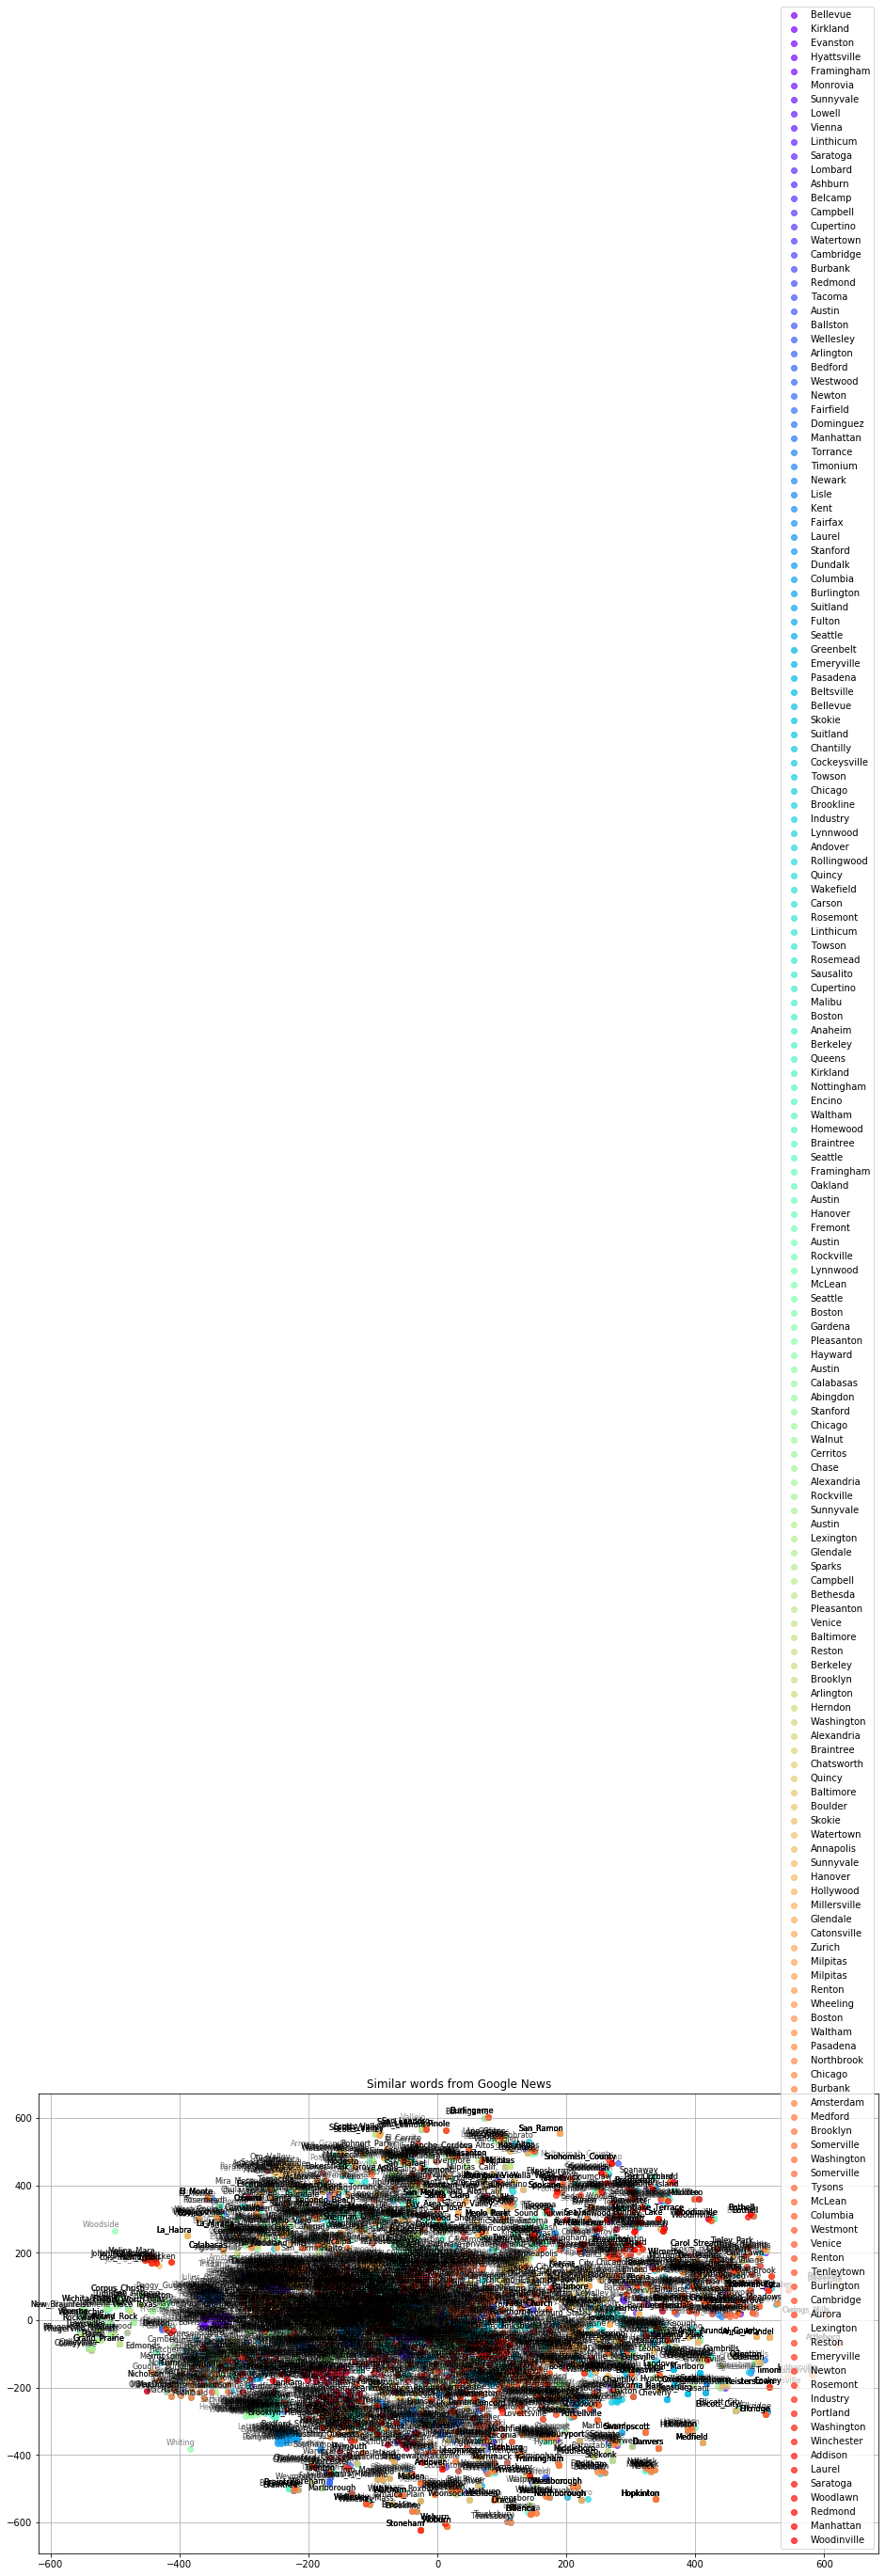

In [110]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', cities, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [31]:
print(postings_ind[4000-66]['snippet'])

This high impact role will have an opportunity to help design and build our data infrastructure from the ground up, work with emerging technologies such as Redshift, while driving business intelligence solutions end-to-end:. Bachelor degree in Engineering, Computer Science, or Statistics; Ability to source and combine disparate data sets to answer business questions....


In [32]:
print(postings_ind[4000-65]['snippet'])

Own features that you develop end to end. The ability to deal with ambiguity, communicate well with partner teams - both technical and non technical, and a strong empathy for the customer experience. Work with end users on requirements gathering, develop and test your code, implement new processes in production, then maintain and support them over time. Develop, implement and tune ETL processes....


In [33]:
postings_ind[4000-65]

{'jobtitle': 'Senior Data Engineer',
 'company': 'Redfin',
 'city': 'Seattle',
 'state': 'WA',
 'country': 'US',
 'language': 'en',
 'formattedLocation': 'Seattle, WA',
 'source': 'Redfin',
 'date': 'Wed, 28 Aug 2019 22:31:07 GMT',
 'snippet': 'Own features that you develop end to end. The ability to deal with ambiguity, communicate well with partner teams - both technical and non technical, and a strong empathy for the customer experience. Work with end users on requirements gathering, develop and test your code, implement new processes in production, then maintain and support them over time. Develop, implement and tune ETL processes....',
 'url': 'http://www.indeed.com/rc/clk?jk=6e8f954b80e6cab2&atk=',
 'onmousedown': "indeed_clk(this,'');",
 'latitude': 47.61149,
 'longitude': -122.343796,
 'jobkey': '6e8f954b80e6cab2',
 'sponsored': False,
 'expired': False,
 'indeedApply': False,
 'formattedLocationFull': 'Seattle, WA 98121',
 'formattedRelativeTime': '30+ days ago',
 'stations': 

In [35]:
len(postings_muse)

568

In [37]:
postings_muse[0]['contents']

'<p><span>Language diverse monorepo seeks experienced wrangler to help its engineers thrive.</span></p>\n\n<p><span>We\'re growing our team rapidly and want to invest in the infrastructure our engineers need to be productive. That\'s where you come in. There\'s a lot to do with immediate impact and your customers are the engineers sitting right by you.\xa0</span></p>\n\n<p><span>Beeswax is an easy to use, massive scale and high availability advertising platform founded by industry veterans who worked together at Google. We’re well funded by leading VCs, such as RRE and Foundry Group, and are rapidly expanding our customer list and our engineering team. We offer our customers the most extensible and transparent advertising system in the world and process millions of transactions per second.\xa0</span></p>\n\n<p><span>Our engineers come from major tech companies such as Amazon and Facebook as well as many other companies with strong software disciplines. Building and selling great advert

In [38]:
postings_gh[1]

{'id': 'e43045e1-b6ee-4916-b9b1-ebf108033a53',
 'type': 'Full Time',
 'url': 'https://jobs.github.com/positions/e43045e1-b6ee-4916-b9b1-ebf108033a53',
 'created_at': 'Mon Sep 09 15:29:25 UTC 2019',
 'company': 'Noe & Associates',
 'company_url': 'http://http',
 'location': 'New York, NY',
 'title': 'Web Developer',
 'description': '<p>A leading international branding and design consultancy is seeking a seasoned Web Developer who will be responsible for coding innovative websites for world renowned premium brand, real estate, hospitality, architecture and design clients.</p>\n<p>The Web Developer will be proficient in building and maintaining small to medium size websites in a fast paced environment. Experienced in working with a team of designers and shipping code as an individual contributor within the team. Individual will care about writing elegant code and look for opportunities to build user-friendly websites that fulfill the goals of an identity system.</p>\n<p>Ideal candidate wi